In [6]:
from sklearn.cluster import *
from sklearn import metrics
from sklearn.mixture import GaussianMixture  # 高斯混合模型
import os
import numpy as np
import librosa
import IPython.display as ipd
from utils import load_filepaths_and_text
import matplotlib.pyplot as plt


In [7]:
embs = []
wavnames = []
speaker_wav_root_path = "DUMMY1"
for idx, wavname in enumerate(os.listdir(speaker_wav_root_path)):
    if wavname.endswith(".wav"):
        embs.append(np.expand_dims(np.load(f"{speaker_wav_root_path}/{wavname}.emo.npy"), axis=0))
        wavnames.append(wavname)

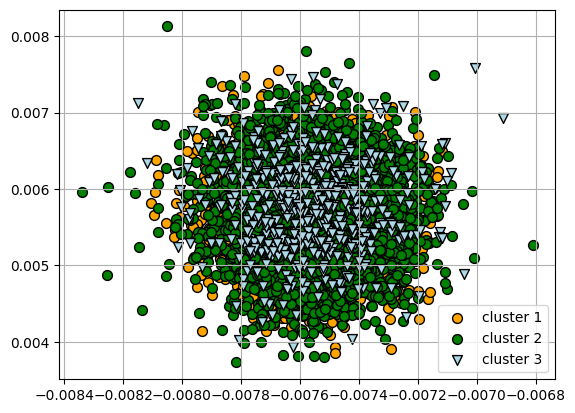

In [9]:
x = np.concatenate(embs,axis=0)

# 聚类算法类的数量
n_clusters = 5
# model = KMeans(n_clusters=n_clusters, random_state=10)
# 可以自行尝试各种不同的聚类算法
model = Birch(n_clusters= n_clusters, threshold= 0.2)
# model = SpectralClustering(n_clusters=n_clusters)
# model = AgglomerativeClustering(n_clusters= n_clusters)

y_predict = model.fit_predict(x)

# 画出预测的三个簇类
plt.scatter(
    x[y_predict == 0,0],x[y_predict == 0,1],
    s = 50, c = 'orange',
    marker= 'o', edgecolors='black',
    label = 'cluster 1'
)

plt.scatter(
    x[y_predict == 1,0],x[y_predict == 1,1],
    s = 50, c = 'green',
    marker= 'o', edgecolors='black',
    label = 'cluster 2'
)

plt.scatter(
    x[y_predict == 2, 0], x[y_predict == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

def disp(rootpath, wavname):
    wav, sr =librosa.load(f"{rootpath}/{wavname}", 16000)
    display(ipd.Audio(wav, rate=sr))
    

In [ ]:
classes=[[] for i in range(y_predict.max()+1)]

for idx, wavname in enumerate(wavnames):
    classes[y_predict[idx]].append(wavname)

for i in range(y_predict.max()+1):
    print("类别:", i, "本类中样本数量:", len(classes[i]))
    """每一个类只预览4条音频"""
    for j in range(4):
        print(classes[i][j])
        disp(speaker_wav_root_path, classes[i][j])

类别: 0 本类中样本数量: 2117
LJ041-0060.wav


LJ036-0043.wav


LJ011-0265.wav


LJ035-0083.wav


类别: 1 本类中样本数量: 2197
LJ005-0143.wav


LJ010-0029.wav


LJ019-0250.wav


ModuleNotFoundError: No module named 'audeer'